# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
from app.models.srex.ranking import Ranking
import json

## Initialize some variables

In [2]:
# Load Stop Words
with open('app/data/stopwords_data.json') as f:
    stopwords_data = json.load(f)
stop_words_list = stopwords_data.get('words')

In [3]:
#query                    = '"internet of things" OR iot'
query                     = 'query AND (expansion OR refinement)'
#query                    = '("Document Title":internet of things   OR   ("Document Title":iot  AND "Document Title":device  )  )  AND ("Abstract":security NOT  "Abstract":visual OR "Document Title":network)'
#query                    = '((( literature  OR document OR information OR data ) AND (retrieval OR retrieve)) OR (search AND engine)  )  AND  (query AND  ( expansion OR refinement OR reformulation))'
nr_search_results        = 10

ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 10
limit_distance           = 4 
include_query_terms  = True

In [4]:
ranking = Ranking(query, nr_search_results, ranking_weight_type, stop_words_list, lema, stem)
ranking.calculate_ieee_xplore_ranking()
#articles = ranking.get_ieee_xplore_ranking()
#dicts = [{"title": a.get('title', ''), "abstract": a.get('abstract', ''), "article_number": a.get('article_number', '')} for a in articles]
#import json
#print(json.dumps(dicts, indent=2))

In [5]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_query_terms, summarize)

In [6]:
for d in ranking.get_documents():
    print(f"TITLE: {d.get_title()} (id:{d.get_doc_id()})")
    for s in d.get_sentences():
        print(f"txt: {s.get_preprocessed_text()}")

TITLE: A survey of query expansion, query suggestion and query refinement techniques (id:7333094)
txt: survey query expansion query suggestion query refinement technique
txt: ineffectiveness information retrieval system often caused inaccurate use keywords query
txt: 
txt: common technique revolving around query modification technique query expansion query refinement etc
txt: due high similarity query modification technique people often confused difference
txt: 
txt: hence paper first briefly discus basic technique query expansion query suggestion query refinement make detailed comparison three technique
txt: finally show promising future research trend field query modification
TITLE: Disjunctive Sets of Phrase Queries for Diverse Query Suggestion (id:8909632)
txt: disjunctive set phrase query diverse query suggestion
txt: paper proposes method suggesting expanded query disambiguate original web query multiple interpretation
txt: order produce diverse set query including corresponding 

In [7]:
for d in ranking.get_documents():
    print(f"doc: {d.get_title()}")
    for s in d.get_sentences():
        print(f"vecinity matrix: {s.get_vicinity_matrix()}")

doc: A survey of query expansion, query suggestion and query refinement techniques
vecinity matrix: {'survey': {'query': [1, 0, 1, 0], 'expansion': [0, 1, 0, 0]}, 'query': {'expansion': [2, 0, 1, 0], 'refinement': [1, 0, 1, 0]}, 'expansion': {'query': [2, 0, 1, 0], 'refinement': [0, 0, 0, 1]}, 'suggestion': {'query': [2, 0, 1, 0], 'expansion': [0, 1, 0, 0], 'refinement': [0, 1, 0, 0]}, 'refinement': {'query': [1, 0, 1, 0], 'expansion': [0, 0, 0, 1]}, 'technique': {'query': [0, 1, 0, 1], 'refinement': [1, 0, 0, 0]}}
vecinity matrix: {'caused': {'query': [0, 0, 0, 1]}, 'inaccurate': {'query': [0, 0, 1, 0]}, 'use': {'query': [0, 1, 0, 0]}, 'keywords': {'query': [1, 0, 0, 0]}}
vecinity matrix: {}
vecinity matrix: {'common': {'query': [0, 0, 0, 1]}, 'technique': {'query': [1, 1, 2, 0], 'expansion': [0, 1, 0, 0], 'refinement': [0, 0, 0, 1]}, 'revolving': {'query': [0, 1, 0, 0]}, 'around': {'query': [1, 0, 0, 1]}, 'query': {'expansion': [2, 0, 0, 1], 'refinement': [1, 0, 1, 0]}, 'modification

In [8]:
#Show graphs from the ranking class
print(ranking.get_graph())

SUBQUERY: query AND (expansion OR refinement)
TERM: technique ; PONDERATION: 11.4 ; DISTANCE: 2.1
TERM: method ; PONDERATION: 10.5 ; DISTANCE: 1.7
TERM: expansion ; PONDERATION: 8.5 ; DISTANCE: 2.4
TERM: patent ; PONDERATION: 8.4 ; DISTANCE: 1.7
TERM: refinement ; PONDERATION: 7.9 ; DISTANCE: 2.7
TERM: user ; PONDERATION: 7.9 ; DISTANCE: 2.2
TERM: using ; PONDERATION: 7.3 ; DISTANCE: 2.5
TERM: term ; PONDERATION: 7.0 ; DISTANCE: 2.0
TERM: suggestion ; PONDERATION: 7.0 ; DISTANCE: 1.9
TERM: searching ; PONDERATION: 6.6 ; DISTANCE: 2.6
TERM: approach ; PONDERATION: 4.9 ; DISTANCE: 1.9
TERM: log ; PONDERATION: 4.4 ; DISTANCE: 2.7
TERM: search ; PONDERATION: 4.2 ; DISTANCE: 3.3
TERM: probabilistic ; PONDERATION: 3.7 ; DISTANCE: 1.5
TERM: etc ; PONDERATION: 3.3 ; DISTANCE: 2.4
TERM: basic ; PONDERATION: 3.2 ; DISTANCE: 2.7
TERM: automated ; PONDERATION: 3.0 ; DISTANCE: 1.5
TERM: based ; PONDERATION: 2.8 ; DISTANCE: 2.0
TERM: retrieval ; PONDERATION: 2.6 ; DISTANCE: 2.9
TERM: quality ; PONDE

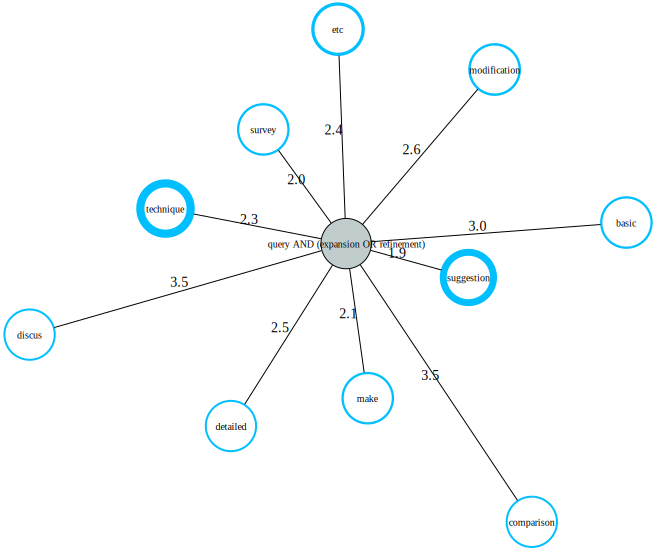

In [9]:
visual_graph1 = ranking.get_document_by_ranking_position(1).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph1

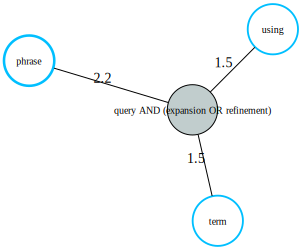

In [10]:
visual_graph2 = ranking.get_document_by_ranking_position(2).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph2

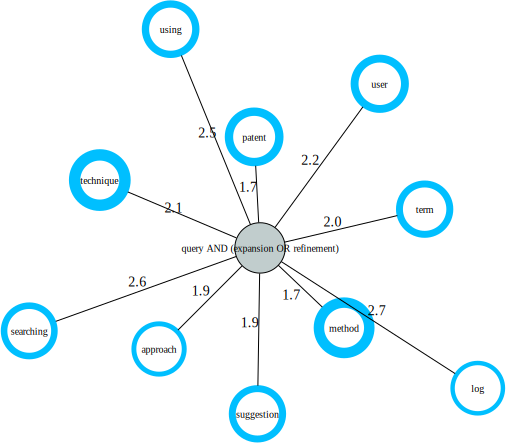

In [11]:
visual_graph = ranking.get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph

In [12]:
ranking.get_graph().get_cosine_similarity(ranking.get_document_by_ranking_position(1).get_graph())

np.float64(0.34608009868800965)

In [22]:
# Top 2 sentence graphs by doc function
def get_top2_graph_sentences(doc, include_ponderation=False):
    g_user = ranking.get_graph()
    top2_graph_sentences = []
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():
            top2_graph_sentences.append((s.get_position_in_doc(), g_user.get_cosine_similarity(s.get_graph(), include_ponderation)))

    if len(top2_graph_sentences) == 1:
        return ((top2_graph_sentences[0][0],top2_graph_sentences[0][0]), 
                (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(),doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph()))
    top2_graph_sentences = sorted(top2_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:2]
    return ((top2_graph_sentences[0][0], top2_graph_sentences[1][0]), 
            (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[1][0]).get_graph()))


# Average similarities by document function
def avg_sim_doc(g_doc_top2_sentences, include_ponderation=False):
    graph_user = ranking.get_graph()
    sim_doc_top1 = graph_user.get_cosine_similarity(g_doc_top2_sentences[0], include_ponderation)
    sim_doc_top2 = graph_user.get_cosine_similarity(g_doc_top2_sentences[1], include_ponderation)
    avg_sim_doc = (sim_doc_top1 + sim_doc_top2) / 2
    return avg_sim_doc


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top2_sentences = []
    avg_sim_docs = []

    for index1 in range(nr_search_results):
        g_docs_top2_sentences.append(get_top2_graph_sentences(ranking.get_document_by_ranking_position(index1+1), include_ponderation))

    for index2 in range(nr_search_results):
        avg_sim_docs.append(avg_sim_doc(g_docs_top2_sentences[index2][1], include_ponderation))
        
    for index3 in range(nr_search_results):
        print(f"doc {index3+1} top 2 sentences: {g_docs_top2_sentences[index3][0]}")
        print(f"doc {index3+1} similarity: {avg_sim_docs[index3]}")
    


print("Similarity without include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=False)
     
print("\nSimilarity with include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=True)


Similarity without include_ponderations
doc 1 top 2 sentences: (6, 3)
doc 1 similarity: 0.2559578049439363
doc 2 top 2 sentences: (7, 7)
doc 2 similarity: 0.15146530941850353
doc 3 top 2 sentences: (1, 0)
doc 3 similarity: 0.253505569044981
doc 4 top 2 sentences: (5, 2)
doc 4 similarity: 0.23226453802699856
doc 5 top 2 sentences: (6, 4)
doc 5 similarity: 0.22970096946482377
doc 6 top 2 sentences: (2, 4)
doc 6 similarity: 0.22317399876638377
doc 7 top 2 sentences: (5, 0)
doc 7 similarity: 0.211017487181902
doc 8 top 2 sentences: (5, 0)
doc 8 similarity: 0.2091860025495047
doc 9 top 2 sentences: (1, 0)
doc 9 similarity: 0.21513018777787254
doc 10 top 2 sentences: (7, 1)
doc 10 similarity: 0.21508622677206962

Similarity with include_ponderations
doc 1 top 2 sentences: (6, 3)
doc 1 similarity: 0.28140396119238936
doc 2 top 2 sentences: (7, 7)
doc 2 similarity: 0.16659685401719845
doc 3 top 2 sentences: (1, 0)
doc 3 similarity: 0.26771986875316645
doc 4 top 2 sentences: (5, 2)
doc 4 simila

In [23]:
def print_documents_similatity(include_ponderation: bool = False):
    for index, doc in enumerate(ranking.get_documents()):
        print(f"doc {index+1}: {ranking.get_graph().get_cosine_similarity(doc.get_graph(), include_ponderation)}")

print("Similarities by document without include_ponderations")
print_documents_similatity(include_ponderation=False)

print("\nSimilarities by document without include_ponderations")
print_documents_similatity(include_ponderation=True)

Similarities by document without include_ponderations
doc 1: 0.34608009868800965
doc 2: 0.15146530941850353
doc 3: 0.3543674245752713
doc 4: 0.46410602655119304
doc 5: 0.36491134534777436
doc 6: 0.3341790056040972
doc 7: 0.38100335683142084
doc 8: 0.25211452715756894
doc 9: 0.36344096878273224
doc 10: 0.3380229767996377

Similarities by document without include_ponderations
doc 1: 0.3675566078372686
doc 2: 0.16659685401719845
doc 3: 0.37356857613444255
doc 4: 0.4644933556755862
doc 5: 0.36022930335265785
doc 6: 0.3463112398779022
doc 7: 0.386741403737868
doc 8: 0.25934796669511395
doc 9: 0.36305069476186685
doc 10: 0.33932762453379595
